# **Introduction**

I will be analysing eBay watches data from anaylsing this csv file with the help of and I'll be using pandas to import the CSV file and matplotlib to create visualizations.

In [37]:
import pandas as pd

# Reading the csv file
df = pd.read_csv('ebay_watches.csv')

# Outputting the data
print(df.to_string())


                         availableText                                 itemLocation    itemNumber                lastUpdated     priceWithCurrency                     seller    sold                                                                             title                                          subTitle          type
0     More than 10 available / 10 sold         Fairfield, New Jersey, United States  335287676769  Mar 29, 2024 08:54:35 PDT            US $519.99                WATCHGOOROO    10.0                          Hamilton Men's H77705145 Khaki Navy 42mm Automatic Watch                                               NaN    Wristwatch
1      More than 10 available / 1 sold                                          NaN  196293471756                        NaN            US $547.50              Direct Luxury     1.0         Salvatore Ferragamo Mens Stainless Steel 42 mm Vega Strap Watch SFMR00322     100% New, Authentic Luxury from Direct Luxury       Watches
2               

The dataset has been success fully been imported into the notebook.

In [38]:
#Printing the first 5 rows of the dataset
df.head()

,availableText,itemLocation,itemNumber,lastUpdated,priceWithCurrency,seller,sold,title,subTitle,type
0,More than 10 available / 10 sold,"Fairfield, New Jersey, United States",335287676769,"Mar 29, 2024 08:54:35 PDT",US $519.99,WATCHGOOROO,10.0,Hamilton Men's H77705145 Khaki Navy 42mm Autom...,NaN,Wristwatch
1,More than 10 available / 1 sold,NaN,196293471756,NaN,US $547.50,Direct Luxury,1.0,Salvatore Ferragamo Mens Stainless Steel 42 mm...,"100% New, Authentic Luxury from Direct Luxury",Watches
2,5 available / 14 sold,"NY, United States",196230375556,"Apr 01, 2024 09:12:53 PDT","US $1,150.00",Sigmatime,14.0,Frederique Constant Men's Highlife Blue Dial S...,NaN,Wristwatch
3,More than 10 available / 2 sold,"Seal Beach, California, United States",196293592707,"Mar 21, 2024 12:09:45 PDT",US $759.99,Direct Luxury,2.0,Versace Mens Gold 43mm Bracelet Fashion Watch,"100% New, Authentic Luxury from Direct Luxury",Watches
4,Last One / 2 sold,"Hong Kong, Hong Kong",155699619233,"Jan 14, 2024 11:32:01 PST",US $565.00,ioomobile,2.0,VENEZIANICO NEREIDE GMT 39 3521502C Automatic ...,NaN,Wristwatch


This shows the first 5 rows of the csv file

In [39]:
#Printing the last 5 rows of the dataset
df.tail()

,availableText,itemLocation,itemNumber,lastUpdated,priceWithCurrency,seller,sold,title,subTitle,type
1995,NaN,"HK, Hong Kong",154970524099,"Feb 03, 2024 16:20:48 PST",US $970.25,Times On Spot,NaN,Seiko Presage Sharp Edge Series Rose Gold Men'...,NaN,Wristwatch
1996,3 available,"NY, United States",195588385621,"Mar 15, 2024 11:58:02 PDT","US $3,999.00/ea",Sigmatime,NaN,Corum Men's 'Admiral Cup' Grey Dial Black Rubb...,NaN,Wristwatch
1997,NaN,"DAYTON, NJ, United States",153130902647,"Feb 15, 2024 07:25:16 PST",US $920.00,Style in Class,NaN,Genuine EPOS Perfection Mechanical self-windin...,NaN,Value
1998,NaN,"Monsey, New York, United States",276288749932,"Mar 19, 2024 00:55:37 PDT","US $1,050.00",Watch County,NaN,Gv2 By Gevril Women's 14410B Burano Diamond Wh...,NaN,Wristwatch
1999,2 available / 2 sold,"Hong Kong, Hong Kong",124650231653,"Nov 29, 2022 19:56:03 PST",US $574.00,Citiwide Store,2.0,Orient RE-AT0002E Automatic Mens Watch US*4,NaN,Wristwatch


This shows the last 5 rows of the csv file

In [40]:
type(df)

pandas.core.frame.DataFrame

The code above shows us the type of data inside the dataset

In [41]:
df.columns

Index(['availableText', 'itemLocation', 'itemNumber', 'lastUpdated',
       'priceWithCurrency', 'seller', 'sold', 'title', 'subTitle', 'type'],
      dtype='object')

This tells us what columns there are in the dataset

In [42]:
df.shape

(2000, 10)

We have 2000 columns and 10 rows that need to be dealt with

In [43]:
df.describe()

,itemNumber,sold
count,2.000000e+03,698.000000
mean,2.295847e+11,12.931232
std,6.100598e+10,76.394325
min,1.241655e+11,1.000000
25%,1.666539e+11,1.000000
50%,2.045511e+11,2.000000
75%,2.666068e+11,6.000000
max,3.353231e+11,1372.000000


Overall based on the values provided by this table, sold count contains a wide range of values, with a relatively high standard deviation, which indicates that there is variability in the number of items sold.

On the other hand, itemNumber also has a large range as well.


There is no missing data in the dataset.

# **Data analysis**

Price distribtutions of listings

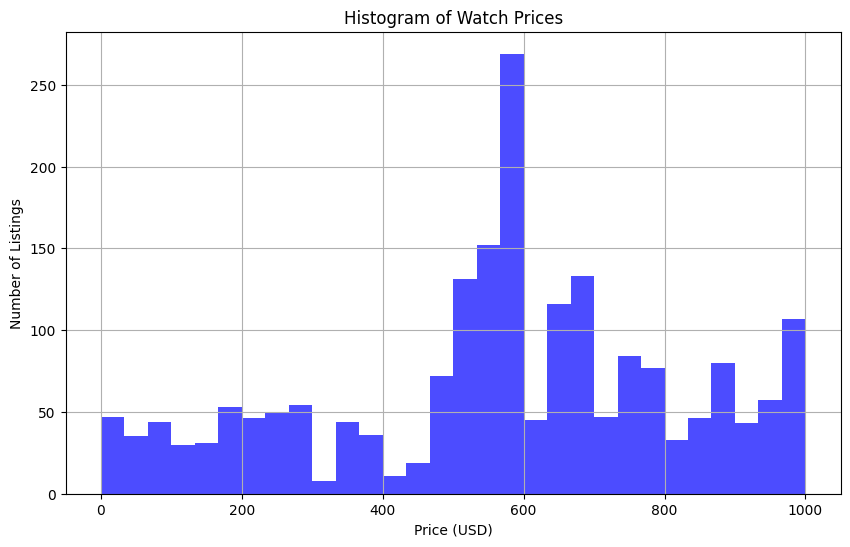

In [44]:
import matplotlib.pyplot as plt

# Extracting numeric values from the 'priceWithCurrency' column
# Assuming all prices are in the format "US $XXX.XX"
df['price'] = df['priceWithCurrency'].str.extract(r'(\d+\.\d+)').astype(float)

# Plotting the histogram for price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Watch Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()


The histogram for price distribution of wathces from the eBay listings, shows the different ranges of prices and how frequently watches fall into different price categories. The highest being over 250 (in terms of number of listings) with a price range of 400-600.

Sales Analysis

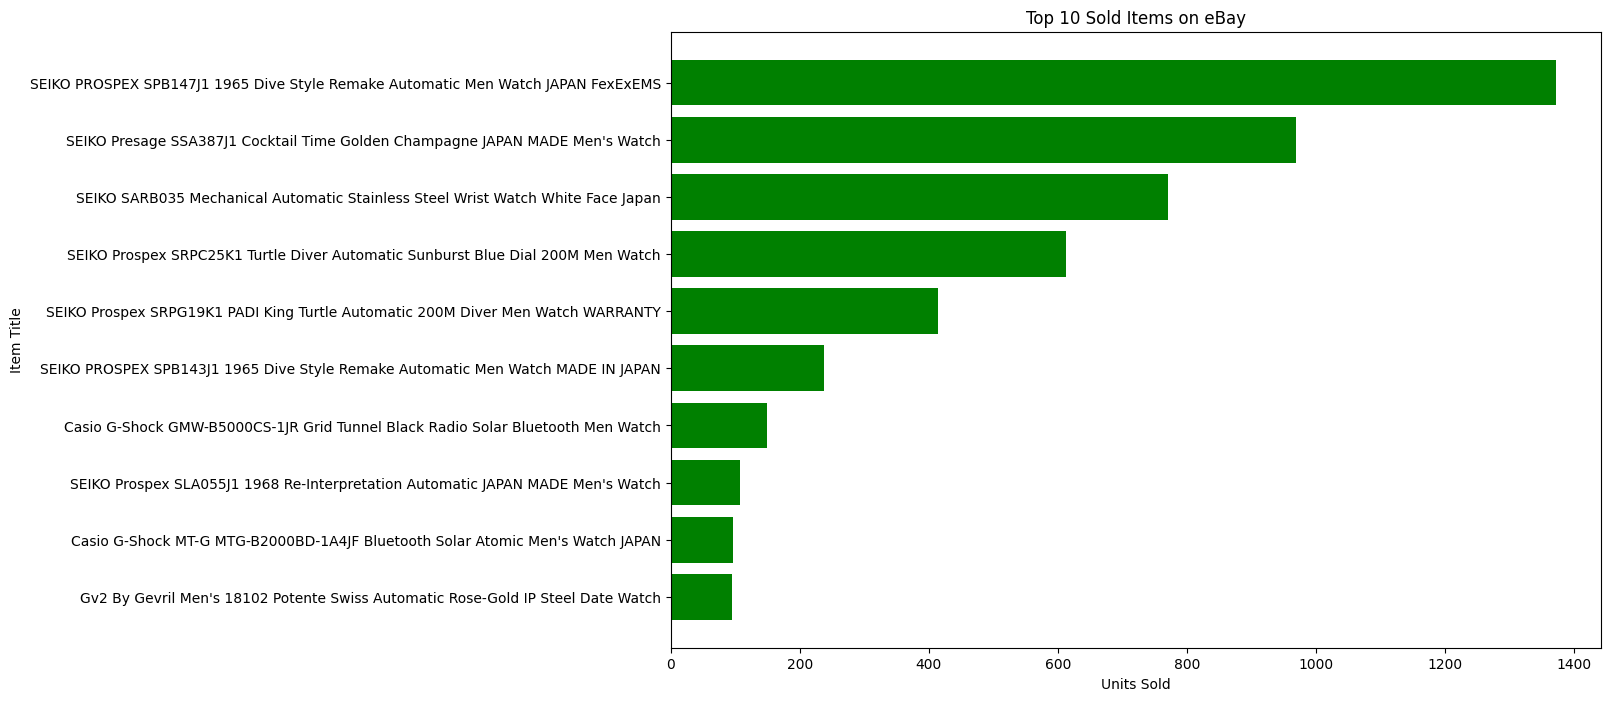

In [45]:
# Filtering and sorting the DataFrame for the top 10 sold items
top_sellers = df[['title', 'sold']].dropna().sort_values(by='sold', ascending=False).head(10)

# Plotting the bar chart for the top sellers
plt.figure(figsize=(12, 8))
plt.barh(top_sellers['title'], top_sellers['sold'], color='green')
plt.xlabel('Units Sold')
plt.ylabel('Item Title')
plt.title('Top 10 Sold Items on eBay')
plt.gca().invert_yaxis()  # To display the highest seller at the top
plt.show()


The bar chart above shows the top 10 sold items on eBay, It shows the which items have the most sold units, therefore making it easier to identify the products that are sold and which products sellers should consider selling.

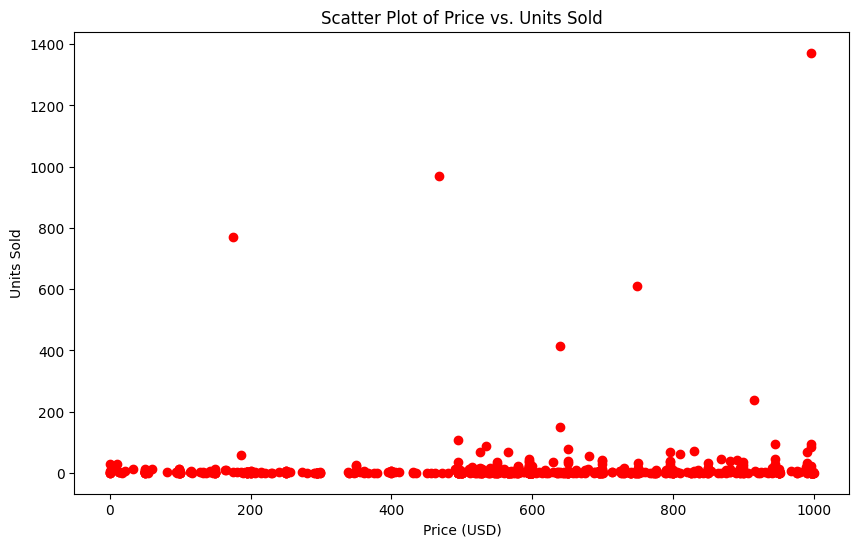

In [46]:
import matplotlib.pyplot as plt


scatter_data = df.dropna(subset=['sold', 'price'])

# Start by setting up the figure
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(scatter_data['price'], scatter_data['sold'], color='red')

# Labeling
plt.xlabel("Price (USD)")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Price vs. Units Sold")


# Display the plot
plt.show()


The scatter plot graph above shows the relationship between the price of watches and the number of units which are sold on eBay. By analysing the graph above it is clear that the more expensive wathces are sold less compared more cheaper watches that are sold.

Linear regression model

In [47]:
#Importing the libraries needed for this model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [48]:
#The price and sold are the colums which will be interested in
df.drop_duplicates(inplace=True)
df.dropna(subset=['price', 'sold'], inplace=True)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)

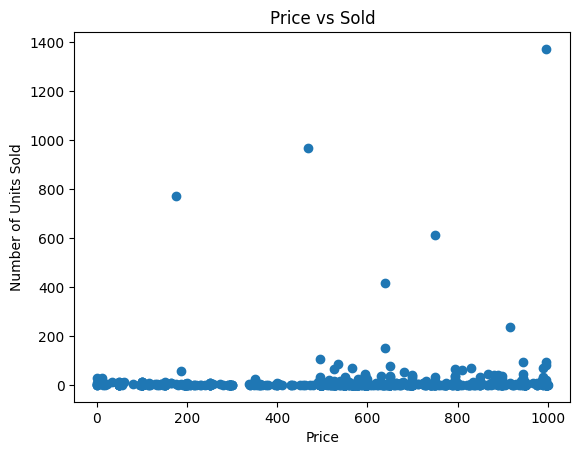

In [49]:
# Plotting the relationship between price and sold
plt.scatter(df['price'], df['sold'])
plt.title('Price vs Sold')
plt.xlabel('Price')
plt.ylabel('Number of Units Sold')
plt.show()


In [50]:
# Setting up the features and target
X = df[['price']]  # Features
y = df['sold']     # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Creating the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
# Making predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1696.1956020265686
R^2 Score: 0.008864212868064825


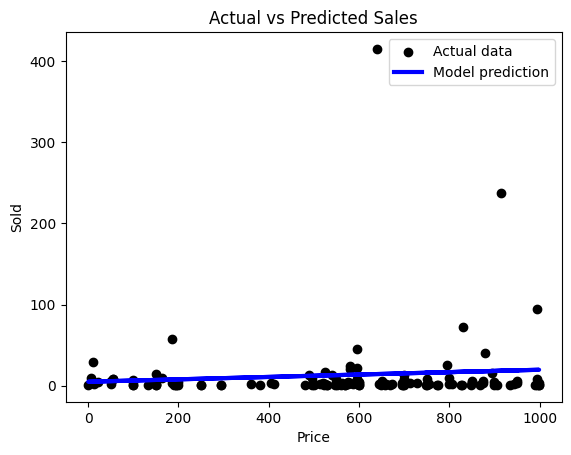

In [53]:
# Plotting the predictions against the actual values
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, predictions, color='blue', linewidth=3, label='Model prediction')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.legend()
plt.show()


By analysing the prediction and actual sales it is clear that as the price rises, the quantity sold will increase. 

The blue line follows the trend of the scatter points, therefore the model has a good fit.